In [276]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import KFold

In [424]:
#Standard neural net with nonlinear activation functions in hidden layers
#Out of many configurations that were tried, none seemed to be particularly best at the job
#This is probably a limitaiton of the small dataset

class FatNet(nn.Module):
    
    def __init__(self, num_genes, hidden_size1 = 24, hidden_size2 = 8):
        super().__init__()
        
        self.fc1 = nn.Linear(num_genes, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        
        self.tanh = nn.Tanh()
        self.tanh1 = nn.Tanh()
        self.relu2 = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, inputs):
        x = self.fc1(inputs.float())
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        x = self.fc3(x)
        x = self.relu2(x)
        return x


In [425]:
#Takes a preprocessed csv file and separates out the training and test dataset|

class PancreasDataset(Dataset):
    def __init__(self):
        super().__init__()
        self.subjects = []
        self.gene_cnts = []
        self.alltargets = []
        df = pd.read_csv('cnts_targets.csv')
        for subject in df:
            if subject != 'Gene':
                self.subjects.append("-".join(subject.split('-')[0:2]))
                self.gene_cnts.append(torch.tensor(df[subject])[:12])
                self.alltargets.append(torch.tensor(df[subject])[12])
        
        self.gene_cnts = torch.stack(self.gene_cnts)
        self.alltargets = torch.stack(self.alltargets)
              
        self.train = self.gene_cnts[0:65]
        self.test = self.gene_cnts[65:]
        self.targets = self.alltargets[0:65]
        self.test_targets = self.alltargets[65:]

        
    def __getitem__(self, i):
        return self.train[i], self.targets[i]
    
    def __len__(self):
        return len(self.train)

In [426]:
dataset = PancreasDataset()
data_loader = DataLoader(dataset, batch_size = 10)
fat_net = FatNet(12)

optimizer = torch.optim.SGD(fat_net.parameters(), lr = 0.0005)
loss_func = torch.nn.MSELoss()


In [427]:
#Train!
for t in range(1500):
    for batch, labels in data_loader:
        
        prediction = fat_net(batch)
        
       # print(prediction)
       # print(labels.view(len(batch),1))

        loss = loss_func(prediction, labels.float().view(len(batch),1))
        
        print(loss)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()



tensor(641.5493, grad_fn=<MseLossBackward>)
tensor(688.7968, grad_fn=<MseLossBackward>)
tensor(946.3712, grad_fn=<MseLossBackward>)
tensor(437.3394, grad_fn=<MseLossBackward>)
tensor(349.8286, grad_fn=<MseLossBackward>)
tensor(420.9399, grad_fn=<MseLossBackward>)
tensor(216.9907, grad_fn=<MseLossBackward>)
tensor(639.9586, grad_fn=<MseLossBackward>)
tensor(688.7782, grad_fn=<MseLossBackward>)
tensor(946.1829, grad_fn=<MseLossBackward>)
tensor(437.3215, grad_fn=<MseLossBackward>)
tensor(349.8169, grad_fn=<MseLossBackward>)
tensor(420.8351, grad_fn=<MseLossBackward>)
tensor(215.4832, grad_fn=<MseLossBackward>)
tensor(638.3726, grad_fn=<MseLossBackward>)
tensor(688.7055, grad_fn=<MseLossBackward>)
tensor(945.9850, grad_fn=<MseLossBackward>)
tensor(437.1714, grad_fn=<MseLossBackward>)
tensor(349.8039, grad_fn=<MseLossBackward>)
tensor(420.6841, grad_fn=<MseLossBackward>)
tensor(213.8734, grad_fn=<MseLossBackward>)
tensor(636.6891, grad_fn=<MseLossBackward>)
tensor(688.5521, grad_fn=<MseLos

tensor(174.4163, grad_fn=<MseLossBackward>)
tensor(133.4256, grad_fn=<MseLossBackward>)
tensor(105.0670, grad_fn=<MseLossBackward>)
tensor(275.1305, grad_fn=<MseLossBackward>)
tensor(340.6207, grad_fn=<MseLossBackward>)
tensor(508.1331, grad_fn=<MseLossBackward>)
tensor(123.7198, grad_fn=<MseLossBackward>)
tensor(173.4412, grad_fn=<MseLossBackward>)
tensor(129.9602, grad_fn=<MseLossBackward>)
tensor(104.8537, grad_fn=<MseLossBackward>)
tensor(269.0687, grad_fn=<MseLossBackward>)
tensor(334.7331, grad_fn=<MseLossBackward>)
tensor(499.7669, grad_fn=<MseLossBackward>)
tensor(119.1852, grad_fn=<MseLossBackward>)
tensor(172.6754, grad_fn=<MseLossBackward>)
tensor(126.9029, grad_fn=<MseLossBackward>)
tensor(104.4929, grad_fn=<MseLossBackward>)
tensor(263.4178, grad_fn=<MseLossBackward>)
tensor(329.3468, grad_fn=<MseLossBackward>)
tensor(491.9122, grad_fn=<MseLossBackward>)
tensor(115.2514, grad_fn=<MseLossBackward>)
tensor(172.0538, grad_fn=<MseLossBackward>)
tensor(124.2156, grad_fn=<MseLos

tensor(393.3921, grad_fn=<MseLossBackward>)
tensor(75.5316, grad_fn=<MseLossBackward>)
tensor(160.6058, grad_fn=<MseLossBackward>)
tensor(105.2513, grad_fn=<MseLossBackward>)
tensor(95.5216, grad_fn=<MseLossBackward>)
tensor(199.7284, grad_fn=<MseLossBackward>)
tensor(248.8910, grad_fn=<MseLossBackward>)
tensor(390.1837, grad_fn=<MseLossBackward>)
tensor(75.0145, grad_fn=<MseLossBackward>)
tensor(160.6196, grad_fn=<MseLossBackward>)
tensor(104.7734, grad_fn=<MseLossBackward>)
tensor(95.6131, grad_fn=<MseLossBackward>)
tensor(209.6549, grad_fn=<MseLossBackward>)
tensor(246.9810, grad_fn=<MseLossBackward>)
tensor(387.5512, grad_fn=<MseLossBackward>)
tensor(74.2609, grad_fn=<MseLossBackward>)
tensor(160.8659, grad_fn=<MseLossBackward>)
tensor(104.9579, grad_fn=<MseLossBackward>)
tensor(95.6541, grad_fn=<MseLossBackward>)
tensor(208.5452, grad_fn=<MseLossBackward>)
tensor(245.1999, grad_fn=<MseLossBackward>)
tensor(385.0537, grad_fn=<MseLossBackward>)
tensor(73.5925, grad_fn=<MseLossBackwa

tensor(199.8503, grad_fn=<MseLossBackward>)
tensor(211.2903, grad_fn=<MseLossBackward>)
tensor(347.0710, grad_fn=<MseLossBackward>)
tensor(65.0684, grad_fn=<MseLossBackward>)
tensor(164.5010, grad_fn=<MseLossBackward>)
tensor(104.3613, grad_fn=<MseLossBackward>)
tensor(80.8522, grad_fn=<MseLossBackward>)
tensor(198.7762, grad_fn=<MseLossBackward>)
tensor(209.7137, grad_fn=<MseLossBackward>)
tensor(351.0349, grad_fn=<MseLossBackward>)
tensor(64.9265, grad_fn=<MseLossBackward>)
tensor(163.7428, grad_fn=<MseLossBackward>)
tensor(103.5591, grad_fn=<MseLossBackward>)
tensor(78.7895, grad_fn=<MseLossBackward>)
tensor(198.1189, grad_fn=<MseLossBackward>)
tensor(208.4472, grad_fn=<MseLossBackward>)
tensor(349.6360, grad_fn=<MseLossBackward>)
tensor(64.7464, grad_fn=<MseLossBackward>)
tensor(163.1766, grad_fn=<MseLossBackward>)
tensor(102.3488, grad_fn=<MseLossBackward>)
tensor(76.1705, grad_fn=<MseLossBackward>)
tensor(197.7245, grad_fn=<MseLossBackward>)
tensor(207.4357, grad_fn=<MseLossBackw

tensor(81.5332, grad_fn=<MseLossBackward>)
tensor(57.4344, grad_fn=<MseLossBackward>)
tensor(189.9603, grad_fn=<MseLossBackward>)
tensor(185.8969, grad_fn=<MseLossBackward>)
tensor(331.6036, grad_fn=<MseLossBackward>)
tensor(71.1368, grad_fn=<MseLossBackward>)
tensor(153.6768, grad_fn=<MseLossBackward>)
tensor(80.7215, grad_fn=<MseLossBackward>)
tensor(50.1553, grad_fn=<MseLossBackward>)
tensor(192.3572, grad_fn=<MseLossBackward>)
tensor(186.2055, grad_fn=<MseLossBackward>)
tensor(327.0792, grad_fn=<MseLossBackward>)
tensor(73.8597, grad_fn=<MseLossBackward>)
tensor(154.7884, grad_fn=<MseLossBackward>)
tensor(80.7235, grad_fn=<MseLossBackward>)
tensor(48.6810, grad_fn=<MseLossBackward>)
tensor(191.7387, grad_fn=<MseLossBackward>)
tensor(184.1264, grad_fn=<MseLossBackward>)
tensor(323.2901, grad_fn=<MseLossBackward>)
tensor(73.7567, grad_fn=<MseLossBackward>)
tensor(155.0805, grad_fn=<MseLossBackward>)
tensor(80.5353, grad_fn=<MseLossBackward>)
tensor(47.9477, grad_fn=<MseLossBackward>)

tensor(145.1271, grad_fn=<MseLossBackward>)
tensor(74.6468, grad_fn=<MseLossBackward>)
tensor(37.3999, grad_fn=<MseLossBackward>)
tensor(176.6183, grad_fn=<MseLossBackward>)
tensor(177.3779, grad_fn=<MseLossBackward>)
tensor(289.3345, grad_fn=<MseLossBackward>)
tensor(83.9807, grad_fn=<MseLossBackward>)
tensor(149.8632, grad_fn=<MseLossBackward>)
tensor(72.5894, grad_fn=<MseLossBackward>)
tensor(36.5610, grad_fn=<MseLossBackward>)
tensor(173.6958, grad_fn=<MseLossBackward>)
tensor(171.4161, grad_fn=<MseLossBackward>)
tensor(281.5141, grad_fn=<MseLossBackward>)
tensor(78.5778, grad_fn=<MseLossBackward>)
tensor(150.1357, grad_fn=<MseLossBackward>)
tensor(72.9931, grad_fn=<MseLossBackward>)
tensor(33.9698, grad_fn=<MseLossBackward>)
tensor(177.6002, grad_fn=<MseLossBackward>)
tensor(203.0352, grad_fn=<MseLossBackward>)
tensor(283.9377, grad_fn=<MseLossBackward>)
tensor(93.9567, grad_fn=<MseLossBackward>)
tensor(152.9898, grad_fn=<MseLossBackward>)
tensor(93.6808, grad_fn=<MseLossBackward>

tensor(266.0551, grad_fn=<MseLossBackward>)
tensor(65.2316, grad_fn=<MseLossBackward>)
tensor(177.0500, grad_fn=<MseLossBackward>)
tensor(119.7816, grad_fn=<MseLossBackward>)
tensor(53.2260, grad_fn=<MseLossBackward>)
tensor(196.7479, grad_fn=<MseLossBackward>)
tensor(194.9617, grad_fn=<MseLossBackward>)
tensor(265.3350, grad_fn=<MseLossBackward>)
tensor(64.9126, grad_fn=<MseLossBackward>)
tensor(176.8502, grad_fn=<MseLossBackward>)
tensor(119.9558, grad_fn=<MseLossBackward>)
tensor(52.8590, grad_fn=<MseLossBackward>)
tensor(196.2315, grad_fn=<MseLossBackward>)
tensor(193.8612, grad_fn=<MseLossBackward>)
tensor(264.8244, grad_fn=<MseLossBackward>)
tensor(64.9429, grad_fn=<MseLossBackward>)
tensor(175.8237, grad_fn=<MseLossBackward>)
tensor(119.5470, grad_fn=<MseLossBackward>)
tensor(51.4264, grad_fn=<MseLossBackward>)
tensor(196.3716, grad_fn=<MseLossBackward>)
tensor(193.4460, grad_fn=<MseLossBackward>)
tensor(264.2983, grad_fn=<MseLossBackward>)
tensor(65.0884, grad_fn=<MseLossBackwa

tensor(210.7375, grad_fn=<MseLossBackward>)
tensor(179.2235, grad_fn=<MseLossBackward>)
tensor(242.8531, grad_fn=<MseLossBackward>)
tensor(68.9802, grad_fn=<MseLossBackward>)
tensor(159.1545, grad_fn=<MseLossBackward>)
tensor(111.8646, grad_fn=<MseLossBackward>)
tensor(41.2347, grad_fn=<MseLossBackward>)
tensor(210.8727, grad_fn=<MseLossBackward>)
tensor(178.3483, grad_fn=<MseLossBackward>)
tensor(242.1438, grad_fn=<MseLossBackward>)
tensor(69.1228, grad_fn=<MseLossBackward>)
tensor(158.8301, grad_fn=<MseLossBackward>)
tensor(111.8766, grad_fn=<MseLossBackward>)
tensor(40.8932, grad_fn=<MseLossBackward>)
tensor(210.9610, grad_fn=<MseLossBackward>)
tensor(177.5229, grad_fn=<MseLossBackward>)
tensor(241.4973, grad_fn=<MseLossBackward>)
tensor(69.2802, grad_fn=<MseLossBackward>)
tensor(158.4896, grad_fn=<MseLossBackward>)
tensor(111.7702, grad_fn=<MseLossBackward>)
tensor(40.5871, grad_fn=<MseLossBackward>)
tensor(211.0035, grad_fn=<MseLossBackward>)
tensor(176.7309, grad_fn=<MseLossBackw

tensor(108.7798, grad_fn=<MseLossBackward>)
tensor(27.1045, grad_fn=<MseLossBackward>)
tensor(209.6079, grad_fn=<MseLossBackward>)
tensor(160.2874, grad_fn=<MseLossBackward>)
tensor(230.2294, grad_fn=<MseLossBackward>)
tensor(76.5147, grad_fn=<MseLossBackward>)
tensor(152.1399, grad_fn=<MseLossBackward>)
tensor(108.9711, grad_fn=<MseLossBackward>)
tensor(26.4492, grad_fn=<MseLossBackward>)
tensor(209.4976, grad_fn=<MseLossBackward>)
tensor(159.5982, grad_fn=<MseLossBackward>)
tensor(231.9223, grad_fn=<MseLossBackward>)
tensor(76.4110, grad_fn=<MseLossBackward>)
tensor(165.1645, grad_fn=<MseLossBackward>)
tensor(135.2598, grad_fn=<MseLossBackward>)
tensor(27.3315, grad_fn=<MseLossBackward>)
tensor(221.6944, grad_fn=<MseLossBackward>)
tensor(187.2211, grad_fn=<MseLossBackward>)
tensor(230.2742, grad_fn=<MseLossBackward>)
tensor(75.4360, grad_fn=<MseLossBackward>)
tensor(154.8729, grad_fn=<MseLossBackward>)
tensor(130.0889, grad_fn=<MseLossBackward>)
tensor(29.3032, grad_fn=<MseLossBackwa

tensor(83.6449, grad_fn=<MseLossBackward>)
tensor(135.4798, grad_fn=<MseLossBackward>)
tensor(110.6083, grad_fn=<MseLossBackward>)
tensor(19.7629, grad_fn=<MseLossBackward>)
tensor(214.4979, grad_fn=<MseLossBackward>)
tensor(153.9817, grad_fn=<MseLossBackward>)
tensor(221.0526, grad_fn=<MseLossBackward>)
tensor(83.5792, grad_fn=<MseLossBackward>)
tensor(135.4091, grad_fn=<MseLossBackward>)
tensor(110.8545, grad_fn=<MseLossBackward>)
tensor(19.5712, grad_fn=<MseLossBackward>)
tensor(214.5203, grad_fn=<MseLossBackward>)
tensor(153.3916, grad_fn=<MseLossBackward>)
tensor(220.7363, grad_fn=<MseLossBackward>)
tensor(83.5341, grad_fn=<MseLossBackward>)
tensor(135.3157, grad_fn=<MseLossBackward>)
tensor(111.0721, grad_fn=<MseLossBackward>)
tensor(19.3991, grad_fn=<MseLossBackward>)
tensor(214.5264, grad_fn=<MseLossBackward>)
tensor(152.8105, grad_fn=<MseLossBackward>)
tensor(220.4844, grad_fn=<MseLossBackward>)
tensor(83.4970, grad_fn=<MseLossBackward>)
tensor(135.2118, grad_fn=<MseLossBackwa

tensor(141.5978, grad_fn=<MseLossBackward>)
tensor(220.8136, grad_fn=<MseLossBackward>)
tensor(83.0194, grad_fn=<MseLossBackward>)
tensor(132.0175, grad_fn=<MseLossBackward>)
tensor(114.9408, grad_fn=<MseLossBackward>)
tensor(17.6873, grad_fn=<MseLossBackward>)
tensor(212.1476, grad_fn=<MseLossBackward>)
tensor(141.2419, grad_fn=<MseLossBackward>)
tensor(220.9516, grad_fn=<MseLossBackward>)
tensor(83.0047, grad_fn=<MseLossBackward>)
tensor(131.8621, grad_fn=<MseLossBackward>)
tensor(115.0643, grad_fn=<MseLossBackward>)
tensor(17.6458, grad_fn=<MseLossBackward>)
tensor(212.0229, grad_fn=<MseLossBackward>)
tensor(140.8773, grad_fn=<MseLossBackward>)
tensor(221.0801, grad_fn=<MseLossBackward>)
tensor(82.9549, grad_fn=<MseLossBackward>)
tensor(131.7302, grad_fn=<MseLossBackward>)
tensor(115.2018, grad_fn=<MseLossBackward>)
tensor(17.6272, grad_fn=<MseLossBackward>)
tensor(211.8911, grad_fn=<MseLossBackward>)
tensor(140.4992, grad_fn=<MseLossBackward>)
tensor(221.2648, grad_fn=<MseLossBackw

tensor(16.8620, grad_fn=<MseLossBackward>)
tensor(208.1818, grad_fn=<MseLossBackward>)
tensor(132.2214, grad_fn=<MseLossBackward>)
tensor(229.6277, grad_fn=<MseLossBackward>)
tensor(81.0825, grad_fn=<MseLossBackward>)
tensor(125.6313, grad_fn=<MseLossBackward>)
tensor(117.0767, grad_fn=<MseLossBackward>)
tensor(16.8470, grad_fn=<MseLossBackward>)
tensor(207.9934, grad_fn=<MseLossBackward>)
tensor(131.8857, grad_fn=<MseLossBackward>)
tensor(230.0612, grad_fn=<MseLossBackward>)
tensor(80.9283, grad_fn=<MseLossBackward>)
tensor(125.2861, grad_fn=<MseLossBackward>)
tensor(117.1407, grad_fn=<MseLossBackward>)
tensor(16.8343, grad_fn=<MseLossBackward>)
tensor(207.8117, grad_fn=<MseLossBackward>)
tensor(131.5504, grad_fn=<MseLossBackward>)
tensor(230.4747, grad_fn=<MseLossBackward>)
tensor(80.7699, grad_fn=<MseLossBackward>)
tensor(124.9443, grad_fn=<MseLossBackward>)
tensor(117.2108, grad_fn=<MseLossBackward>)
tensor(16.8247, grad_fn=<MseLossBackward>)
tensor(207.6378, grad_fn=<MseLossBackwa

tensor(119.7388, grad_fn=<MseLossBackward>)
tensor(120.2347, grad_fn=<MseLossBackward>)
tensor(16.6477, grad_fn=<MseLossBackward>)
tensor(205.5997, grad_fn=<MseLossBackward>)
tensor(124.7171, grad_fn=<MseLossBackward>)
tensor(233.2410, grad_fn=<MseLossBackward>)
tensor(78.6269, grad_fn=<MseLossBackward>)
tensor(119.6299, grad_fn=<MseLossBackward>)
tensor(120.3881, grad_fn=<MseLossBackward>)
tensor(16.6401, grad_fn=<MseLossBackward>)
tensor(205.5414, grad_fn=<MseLossBackward>)
tensor(124.5159, grad_fn=<MseLossBackward>)
tensor(233.1572, grad_fn=<MseLossBackward>)
tensor(78.6032, grad_fn=<MseLossBackward>)
tensor(119.5296, grad_fn=<MseLossBackward>)
tensor(120.5470, grad_fn=<MseLossBackward>)
tensor(16.6352, grad_fn=<MseLossBackward>)
tensor(205.4892, grad_fn=<MseLossBackward>)
tensor(124.3072, grad_fn=<MseLossBackward>)
tensor(233.0648, grad_fn=<MseLossBackward>)
tensor(78.5622, grad_fn=<MseLossBackward>)
tensor(119.4451, grad_fn=<MseLossBackward>)
tensor(120.7181, grad_fn=<MseLossBackw

tensor(239.6657, grad_fn=<MseLossBackward>)
tensor(73.2489, grad_fn=<MseLossBackward>)
tensor(120.8598, grad_fn=<MseLossBackward>)
tensor(111.9397, grad_fn=<MseLossBackward>)
tensor(21.8832, grad_fn=<MseLossBackward>)
tensor(202.2585, grad_fn=<MseLossBackward>)
tensor(120.3810, grad_fn=<MseLossBackward>)
tensor(239.1005, grad_fn=<MseLossBackward>)
tensor(73.2946, grad_fn=<MseLossBackward>)
tensor(120.8948, grad_fn=<MseLossBackward>)
tensor(111.9787, grad_fn=<MseLossBackward>)
tensor(21.5223, grad_fn=<MseLossBackward>)
tensor(202.4849, grad_fn=<MseLossBackward>)
tensor(120.2103, grad_fn=<MseLossBackward>)
tensor(238.5617, grad_fn=<MseLossBackward>)
tensor(73.3397, grad_fn=<MseLossBackward>)
tensor(120.9212, grad_fn=<MseLossBackward>)
tensor(112.0147, grad_fn=<MseLossBackward>)
tensor(21.1977, grad_fn=<MseLossBackward>)
tensor(202.7058, grad_fn=<MseLossBackward>)
tensor(120.0473, grad_fn=<MseLossBackward>)
tensor(238.0474, grad_fn=<MseLossBackward>)
tensor(73.3845, grad_fn=<MseLossBackwa

tensor(206.1310, grad_fn=<MseLossBackward>)
tensor(117.1718, grad_fn=<MseLossBackward>)
tensor(229.7400, grad_fn=<MseLossBackward>)
tensor(74.5488, grad_fn=<MseLossBackward>)
tensor(120.4335, grad_fn=<MseLossBackward>)
tensor(112.1748, grad_fn=<MseLossBackward>)
tensor(18.0384, grad_fn=<MseLossBackward>)
tensor(206.2215, grad_fn=<MseLossBackward>)
tensor(117.0743, grad_fn=<MseLossBackward>)
tensor(229.4739, grad_fn=<MseLossBackward>)
tensor(74.5984, grad_fn=<MseLossBackward>)
tensor(120.4015, grad_fn=<MseLossBackward>)
tensor(112.1492, grad_fn=<MseLossBackward>)
tensor(17.9956, grad_fn=<MseLossBackward>)
tensor(206.3094, grad_fn=<MseLossBackward>)
tensor(116.9780, grad_fn=<MseLossBackward>)
tensor(229.2104, grad_fn=<MseLossBackward>)
tensor(74.6481, grad_fn=<MseLossBackward>)
tensor(120.3696, grad_fn=<MseLossBackward>)
tensor(112.1213, grad_fn=<MseLossBackward>)
tensor(17.9562, grad_fn=<MseLossBackward>)
tensor(206.3945, grad_fn=<MseLossBackward>)
tensor(116.8827, grad_fn=<MseLossBackw

tensor(111.3677, grad_fn=<MseLossBackward>)
tensor(17.8247, grad_fn=<MseLossBackward>)
tensor(207.6136, grad_fn=<MseLossBackward>)
tensor(114.7164, grad_fn=<MseLossBackward>)
tensor(223.4493, grad_fn=<MseLossBackward>)
tensor(75.8559, grad_fn=<MseLossBackward>)
tensor(119.7497, grad_fn=<MseLossBackward>)
tensor(111.3552, grad_fn=<MseLossBackward>)
tensor(17.8378, grad_fn=<MseLossBackward>)
tensor(207.6314, grad_fn=<MseLossBackward>)
tensor(114.6264, grad_fn=<MseLossBackward>)
tensor(223.2576, grad_fn=<MseLossBackward>)
tensor(75.9000, grad_fn=<MseLossBackward>)
tensor(119.7372, grad_fn=<MseLossBackward>)
tensor(111.3451, grad_fn=<MseLossBackward>)
tensor(17.8512, grad_fn=<MseLossBackward>)
tensor(207.6471, grad_fn=<MseLossBackward>)
tensor(114.5363, grad_fn=<MseLossBackward>)
tensor(223.0690, grad_fn=<MseLossBackward>)
tensor(75.9436, grad_fn=<MseLossBackward>)
tensor(119.7257, grad_fn=<MseLossBackward>)
tensor(111.3372, grad_fn=<MseLossBackward>)
tensor(17.8646, grad_fn=<MseLossBackwa

tensor(76.8349, grad_fn=<MseLossBackward>)
tensor(119.7403, grad_fn=<MseLossBackward>)
tensor(111.6568, grad_fn=<MseLossBackward>)
tensor(18.1027, grad_fn=<MseLossBackward>)
tensor(207.5560, grad_fn=<MseLossBackward>)
tensor(112.3338, grad_fn=<MseLossBackward>)
tensor(219.2526, grad_fn=<MseLossBackward>)
tensor(76.8656, grad_fn=<MseLossBackward>)
tensor(119.7503, grad_fn=<MseLossBackward>)
tensor(111.6838, grad_fn=<MseLossBackward>)
tensor(18.1074, grad_fn=<MseLossBackward>)
tensor(207.5397, grad_fn=<MseLossBackward>)
tensor(112.2492, grad_fn=<MseLossBackward>)
tensor(219.1302, grad_fn=<MseLossBackward>)
tensor(76.8960, grad_fn=<MseLossBackward>)
tensor(119.7607, grad_fn=<MseLossBackward>)
tensor(111.7114, grad_fn=<MseLossBackward>)
tensor(18.1118, grad_fn=<MseLossBackward>)
tensor(207.5229, grad_fn=<MseLossBackward>)
tensor(112.1650, grad_fn=<MseLossBackward>)
tensor(219.0098, grad_fn=<MseLossBackward>)
tensor(76.9258, grad_fn=<MseLossBackward>)
tensor(119.7717, grad_fn=<MseLossBackwa

tensor(110.1778, grad_fn=<MseLossBackward>)
tensor(216.7616, grad_fn=<MseLossBackward>)
tensor(77.5598, grad_fn=<MseLossBackward>)
tensor(119.5594, grad_fn=<MseLossBackward>)
tensor(112.5576, grad_fn=<MseLossBackward>)
tensor(17.9709, grad_fn=<MseLossBackward>)
tensor(206.9226, grad_fn=<MseLossBackward>)
tensor(110.0906, grad_fn=<MseLossBackward>)
tensor(216.6964, grad_fn=<MseLossBackward>)
tensor(77.5822, grad_fn=<MseLossBackward>)
tensor(119.5728, grad_fn=<MseLossBackward>)
tensor(112.5998, grad_fn=<MseLossBackward>)
tensor(17.9560, grad_fn=<MseLossBackward>)
tensor(206.8922, grad_fn=<MseLossBackward>)
tensor(110.0046, grad_fn=<MseLossBackward>)
tensor(216.6316, grad_fn=<MseLossBackward>)
tensor(77.6033, grad_fn=<MseLossBackward>)
tensor(119.5867, grad_fn=<MseLossBackward>)
tensor(112.6409, grad_fn=<MseLossBackward>)
tensor(17.9423, grad_fn=<MseLossBackward>)
tensor(206.8621, grad_fn=<MseLossBackward>)
tensor(109.9199, grad_fn=<MseLossBackward>)
tensor(216.5674, grad_fn=<MseLossBackw

tensor(17.8142, grad_fn=<MseLossBackward>)
tensor(206.1044, grad_fn=<MseLossBackward>)
tensor(108.0474, grad_fn=<MseLossBackward>)
tensor(215.4116, grad_fn=<MseLossBackward>)
tensor(77.9065, grad_fn=<MseLossBackward>)
tensor(119.9807, grad_fn=<MseLossBackward>)
tensor(113.4309, grad_fn=<MseLossBackward>)
tensor(17.8001, grad_fn=<MseLossBackward>)
tensor(206.0775, grad_fn=<MseLossBackward>)
tensor(107.9795, grad_fn=<MseLossBackward>)
tensor(215.3766, grad_fn=<MseLossBackward>)
tensor(77.9128, grad_fn=<MseLossBackward>)
tensor(119.9976, grad_fn=<MseLossBackward>)
tensor(113.4103, grad_fn=<MseLossBackward>)
tensor(17.7454, grad_fn=<MseLossBackward>)
tensor(206.0826, grad_fn=<MseLossBackward>)
tensor(107.9093, grad_fn=<MseLossBackward>)
tensor(215.3610, grad_fn=<MseLossBackward>)
tensor(77.9294, grad_fn=<MseLossBackward>)
tensor(120.0201, grad_fn=<MseLossBackward>)
tensor(113.5037, grad_fn=<MseLossBackward>)
tensor(17.8165, grad_fn=<MseLossBackward>)
tensor(205.9944, grad_fn=<MseLossBackwa

tensor(120.3692, grad_fn=<MseLossBackward>)
tensor(114.0825, grad_fn=<MseLossBackward>)
tensor(17.7111, grad_fn=<MseLossBackward>)
tensor(205.1628, grad_fn=<MseLossBackward>)
tensor(106.1552, grad_fn=<MseLossBackward>)
tensor(214.8888, grad_fn=<MseLossBackward>)
tensor(77.9215, grad_fn=<MseLossBackward>)
tensor(120.3893, grad_fn=<MseLossBackward>)
tensor(114.1489, grad_fn=<MseLossBackward>)
tensor(17.7621, grad_fn=<MseLossBackward>)
tensor(205.0863, grad_fn=<MseLossBackward>)
tensor(106.0796, grad_fn=<MseLossBackward>)
tensor(214.8769, grad_fn=<MseLossBackward>)
tensor(77.9082, grad_fn=<MseLossBackward>)
tensor(120.4029, grad_fn=<MseLossBackward>)
tensor(114.1199, grad_fn=<MseLossBackward>)
tensor(17.7112, grad_fn=<MseLossBackward>)
tensor(205.0829, grad_fn=<MseLossBackward>)
tensor(106.0129, grad_fn=<MseLossBackward>)
tensor(214.8952, grad_fn=<MseLossBackward>)
tensor(77.9140, grad_fn=<MseLossBackward>)
tensor(120.4301, grad_fn=<MseLossBackward>)
tensor(114.2109, grad_fn=<MseLossBackw

tensor(215.0097, grad_fn=<MseLossBackward>)
tensor(77.7381, grad_fn=<MseLossBackward>)
tensor(120.7386, grad_fn=<MseLossBackward>)
tensor(114.6714, grad_fn=<MseLossBackward>)
tensor(17.7360, grad_fn=<MseLossBackward>)
tensor(204.0708, grad_fn=<MseLossBackward>)
tensor(104.3311, grad_fn=<MseLossBackward>)
tensor(215.0395, grad_fn=<MseLossBackward>)
tensor(77.7320, grad_fn=<MseLossBackward>)
tensor(120.7589, grad_fn=<MseLossBackward>)
tensor(114.7357, grad_fn=<MseLossBackward>)
tensor(17.7891, grad_fn=<MseLossBackward>)
tensor(203.9947, grad_fn=<MseLossBackward>)
tensor(104.2604, grad_fn=<MseLossBackward>)
tensor(215.0403, grad_fn=<MseLossBackward>)
tensor(77.7149, grad_fn=<MseLossBackward>)
tensor(120.7700, grad_fn=<MseLossBackward>)
tensor(114.6965, grad_fn=<MseLossBackward>)
tensor(17.7368, grad_fn=<MseLossBackward>)
tensor(203.9924, grad_fn=<MseLossBackward>)
tensor(104.1976, grad_fn=<MseLossBackward>)
tensor(215.0791, grad_fn=<MseLossBackward>)
tensor(77.7150, grad_fn=<MseLossBackwa

tensor(203.0023, grad_fn=<MseLossBackward>)
tensor(102.7021, grad_fn=<MseLossBackward>)
tensor(215.3449, grad_fn=<MseLossBackward>)
tensor(77.4879, grad_fn=<MseLossBackward>)
tensor(121.1017, grad_fn=<MseLossBackward>)
tensor(115.1853, grad_fn=<MseLossBackward>)
tensor(17.8582, grad_fn=<MseLossBackward>)
tensor(202.9827, grad_fn=<MseLossBackward>)
tensor(102.6442, grad_fn=<MseLossBackward>)
tensor(215.3678, grad_fn=<MseLossBackward>)
tensor(77.4828, grad_fn=<MseLossBackward>)
tensor(121.1178, grad_fn=<MseLossBackward>)
tensor(115.1508, grad_fn=<MseLossBackward>)
tensor(17.8143, grad_fn=<MseLossBackward>)
tensor(202.9767, grad_fn=<MseLossBackward>)
tensor(102.5794, grad_fn=<MseLossBackward>)
tensor(215.4130, grad_fn=<MseLossBackward>)
tensor(77.4799, grad_fn=<MseLossBackward>)
tensor(121.1453, grad_fn=<MseLossBackward>)
tensor(115.2359, grad_fn=<MseLossBackward>)
tensor(17.8866, grad_fn=<MseLossBackward>)
tensor(202.8916, grad_fn=<MseLossBackward>)
tensor(102.5103, grad_fn=<MseLossBackw

tensor(115.5177, grad_fn=<MseLossBackward>)
tensor(17.9047, grad_fn=<MseLossBackward>)
tensor(202.0914, grad_fn=<MseLossBackward>)
tensor(101.1149, grad_fn=<MseLossBackward>)
tensor(215.7084, grad_fn=<MseLossBackward>)
tensor(77.2794, grad_fn=<MseLossBackward>)
tensor(121.5178, grad_fn=<MseLossBackward>)
tensor(115.6075, grad_fn=<MseLossBackward>)
tensor(17.9773, grad_fn=<MseLossBackward>)
tensor(202.0131, grad_fn=<MseLossBackward>)
tensor(101.0526, grad_fn=<MseLossBackward>)
tensor(215.6834, grad_fn=<MseLossBackward>)
tensor(77.2645, grad_fn=<MseLossBackward>)
tensor(121.5268, grad_fn=<MseLossBackward>)
tensor(115.6292, grad_fn=<MseLossBackward>)
tensor(17.9865, grad_fn=<MseLossBackward>)
tensor(201.9787, grad_fn=<MseLossBackward>)
tensor(101.0046, grad_fn=<MseLossBackward>)
tensor(215.6743, grad_fn=<MseLossBackward>)
tensor(77.2585, grad_fn=<MseLossBackward>)
tensor(121.5314, grad_fn=<MseLossBackward>)
tensor(115.6245, grad_fn=<MseLossBackward>)
tensor(17.9710, grad_fn=<MseLossBackwa

tensor(77.1224, grad_fn=<MseLossBackward>)
tensor(121.8909, grad_fn=<MseLossBackward>)
tensor(115.9146, grad_fn=<MseLossBackward>)
tensor(18.0423, grad_fn=<MseLossBackward>)
tensor(201.2651, grad_fn=<MseLossBackward>)
tensor(99.6545, grad_fn=<MseLossBackward>)
tensor(215.8222, grad_fn=<MseLossBackward>)
tensor(77.1137, grad_fn=<MseLossBackward>)
tensor(121.8983, grad_fn=<MseLossBackward>)
tensor(115.8952, grad_fn=<MseLossBackward>)
tensor(18.0193, grad_fn=<MseLossBackward>)
tensor(201.2556, grad_fn=<MseLossBackward>)
tensor(99.6041, grad_fn=<MseLossBackward>)
tensor(215.8410, grad_fn=<MseLossBackward>)
tensor(77.1108, grad_fn=<MseLossBackward>)
tensor(121.9137, grad_fn=<MseLossBackward>)
tensor(115.9164, grad_fn=<MseLossBackward>)
tensor(18.0323, grad_fn=<MseLossBackward>)
tensor(201.2226, grad_fn=<MseLossBackward>)
tensor(99.5494, grad_fn=<MseLossBackward>)
tensor(215.8426, grad_fn=<MseLossBackward>)
tensor(77.1044, grad_fn=<MseLossBackward>)
tensor(121.9292, grad_fn=<MseLossBackward>

tensor(106.6970, grad_fn=<MseLossBackward>)
tensor(219.5154, grad_fn=<MseLossBackward>)
tensor(77.3649, grad_fn=<MseLossBackward>)
tensor(155.5900, grad_fn=<MseLossBackward>)
tensor(106.6956, grad_fn=<MseLossBackward>)
tensor(18.6031, grad_fn=<MseLossBackward>)
tensor(183.9115, grad_fn=<MseLossBackward>)
tensor(106.5198, grad_fn=<MseLossBackward>)
tensor(219.3029, grad_fn=<MseLossBackward>)
tensor(77.4196, grad_fn=<MseLossBackward>)
tensor(155.6731, grad_fn=<MseLossBackward>)
tensor(106.5875, grad_fn=<MseLossBackward>)
tensor(18.5977, grad_fn=<MseLossBackward>)
tensor(183.9738, grad_fn=<MseLossBackward>)
tensor(106.3671, grad_fn=<MseLossBackward>)
tensor(219.0799, grad_fn=<MseLossBackward>)
tensor(77.4755, grad_fn=<MseLossBackward>)
tensor(155.7516, grad_fn=<MseLossBackward>)
tensor(106.5042, grad_fn=<MseLossBackward>)
tensor(18.5754, grad_fn=<MseLossBackward>)
tensor(184.0392, grad_fn=<MseLossBackward>)
tensor(106.2301, grad_fn=<MseLossBackward>)
tensor(218.8585, grad_fn=<MseLossBackw

tensor(18.1708, grad_fn=<MseLossBackward>)
tensor(184.8081, grad_fn=<MseLossBackward>)
tensor(103.9918, grad_fn=<MseLossBackward>)
tensor(216.5551, grad_fn=<MseLossBackward>)
tensor(77.9821, grad_fn=<MseLossBackward>)
tensor(156.7054, grad_fn=<MseLossBackward>)
tensor(105.9007, grad_fn=<MseLossBackward>)
tensor(18.1732, grad_fn=<MseLossBackward>)
tensor(184.8156, grad_fn=<MseLossBackward>)
tensor(103.9157, grad_fn=<MseLossBackward>)
tensor(216.5284, grad_fn=<MseLossBackward>)
tensor(77.9817, grad_fn=<MseLossBackward>)
tensor(156.7250, grad_fn=<MseLossBackward>)
tensor(105.8860, grad_fn=<MseLossBackward>)
tensor(18.1761, grad_fn=<MseLossBackward>)
tensor(184.8223, grad_fn=<MseLossBackward>)
tensor(103.8403, grad_fn=<MseLossBackward>)
tensor(216.5038, grad_fn=<MseLossBackward>)
tensor(77.9808, grad_fn=<MseLossBackward>)
tensor(156.7441, grad_fn=<MseLossBackward>)
tensor(105.8716, grad_fn=<MseLossBackward>)
tensor(18.1796, grad_fn=<MseLossBackward>)
tensor(184.8282, grad_fn=<MseLossBackwa

tensor(157.1196, grad_fn=<MseLossBackward>)
tensor(105.5644, grad_fn=<MseLossBackward>)
tensor(18.3168, grad_fn=<MseLossBackward>)
tensor(184.8559, grad_fn=<MseLossBackward>)
tensor(102.1212, grad_fn=<MseLossBackward>)
tensor(216.2052, grad_fn=<MseLossBackward>)
tensor(77.8966, grad_fn=<MseLossBackward>)
tensor(157.1335, grad_fn=<MseLossBackward>)
tensor(105.5526, grad_fn=<MseLossBackward>)
tensor(18.3227, grad_fn=<MseLossBackward>)
tensor(184.8551, grad_fn=<MseLossBackward>)
tensor(102.0571, grad_fn=<MseLossBackward>)
tensor(216.1982, grad_fn=<MseLossBackward>)
tensor(77.8930, grad_fn=<MseLossBackward>)
tensor(157.1474, grad_fn=<MseLossBackward>)
tensor(105.5407, grad_fn=<MseLossBackward>)
tensor(18.3284, grad_fn=<MseLossBackward>)
tensor(184.8542, grad_fn=<MseLossBackward>)
tensor(101.9933, grad_fn=<MseLossBackward>)
tensor(216.1913, grad_fn=<MseLossBackward>)
tensor(77.8895, grad_fn=<MseLossBackward>)
tensor(157.1611, grad_fn=<MseLossBackward>)
tensor(105.5290, grad_fn=<MseLossBackw

tensor(215.5758, grad_fn=<MseLossBackward>)
tensor(78.2907, grad_fn=<MseLossBackward>)
tensor(157.4645, grad_fn=<MseLossBackward>)
tensor(69.5560, grad_fn=<MseLossBackward>)
tensor(18.1520, grad_fn=<MseLossBackward>)
tensor(186.0171, grad_fn=<MseLossBackward>)
tensor(95.8251, grad_fn=<MseLossBackward>)
tensor(215.4574, grad_fn=<MseLossBackward>)
tensor(78.2965, grad_fn=<MseLossBackward>)
tensor(157.5004, grad_fn=<MseLossBackward>)
tensor(68.6701, grad_fn=<MseLossBackward>)
tensor(18.0416, grad_fn=<MseLossBackward>)
tensor(186.2006, grad_fn=<MseLossBackward>)
tensor(95.5055, grad_fn=<MseLossBackward>)
tensor(215.3789, grad_fn=<MseLossBackward>)
tensor(78.2850, grad_fn=<MseLossBackward>)
tensor(157.5361, grad_fn=<MseLossBackward>)
tensor(67.7816, grad_fn=<MseLossBackward>)
tensor(17.9233, grad_fn=<MseLossBackward>)
tensor(186.3658, grad_fn=<MseLossBackward>)
tensor(95.2169, grad_fn=<MseLossBackward>)
tensor(215.3368, grad_fn=<MseLossBackward>)
tensor(78.2973, grad_fn=<MseLossBackward>)
t

tensor(99.3498, grad_fn=<MseLossBackward>)
tensor(217.4631, grad_fn=<MseLossBackward>)
tensor(78.0528, grad_fn=<MseLossBackward>)
tensor(158.1873, grad_fn=<MseLossBackward>)
tensor(106.6415, grad_fn=<MseLossBackward>)
tensor(16.5554, grad_fn=<MseLossBackward>)
tensor(182.2396, grad_fn=<MseLossBackward>)
tensor(99.3085, grad_fn=<MseLossBackward>)
tensor(217.3781, grad_fn=<MseLossBackward>)
tensor(78.0026, grad_fn=<MseLossBackward>)
tensor(158.1978, grad_fn=<MseLossBackward>)
tensor(106.5545, grad_fn=<MseLossBackward>)
tensor(16.6286, grad_fn=<MseLossBackward>)
tensor(182.1973, grad_fn=<MseLossBackward>)
tensor(99.2656, grad_fn=<MseLossBackward>)
tensor(217.2943, grad_fn=<MseLossBackward>)
tensor(77.9563, grad_fn=<MseLossBackward>)
tensor(158.2091, grad_fn=<MseLossBackward>)
tensor(106.4689, grad_fn=<MseLossBackward>)
tensor(16.6995, grad_fn=<MseLossBackward>)
tensor(182.1522, grad_fn=<MseLossBackward>)
tensor(99.2210, grad_fn=<MseLossBackward>)
tensor(217.2116, grad_fn=<MseLossBackward>

tensor(195.1888, grad_fn=<MseLossBackward>)
tensor(97.7455, grad_fn=<MseLossBackward>)
tensor(213.3474, grad_fn=<MseLossBackward>)
tensor(77.5100, grad_fn=<MseLossBackward>)
tensor(158.4321, grad_fn=<MseLossBackward>)
tensor(101.4747, grad_fn=<MseLossBackward>)
tensor(19.5113, grad_fn=<MseLossBackward>)
tensor(193.4958, grad_fn=<MseLossBackward>)
tensor(97.7948, grad_fn=<MseLossBackward>)
tensor(213.8362, grad_fn=<MseLossBackward>)
tensor(77.4839, grad_fn=<MseLossBackward>)
tensor(158.3869, grad_fn=<MseLossBackward>)
tensor(101.8233, grad_fn=<MseLossBackward>)
tensor(19.3565, grad_fn=<MseLossBackward>)
tensor(192.2809, grad_fn=<MseLossBackward>)
tensor(97.7953, grad_fn=<MseLossBackward>)
tensor(214.2192, grad_fn=<MseLossBackward>)
tensor(77.4776, grad_fn=<MseLossBackward>)
tensor(158.3518, grad_fn=<MseLossBackward>)
tensor(102.1039, grad_fn=<MseLossBackward>)
tensor(19.2240, grad_fn=<MseLossBackward>)
tensor(191.3675, grad_fn=<MseLossBackward>)
tensor(97.7623, grad_fn=<MseLossBackward>

tensor(18.4974, grad_fn=<MseLossBackward>)
tensor(186.5711, grad_fn=<MseLossBackward>)
tensor(95.7249, grad_fn=<MseLossBackward>)
tensor(216.0813, grad_fn=<MseLossBackward>)
tensor(77.8336, grad_fn=<MseLossBackward>)
tensor(158.4289, grad_fn=<MseLossBackward>)
tensor(103.6307, grad_fn=<MseLossBackward>)
tensor(18.4973, grad_fn=<MseLossBackward>)
tensor(186.5218, grad_fn=<MseLossBackward>)
tensor(95.6422, grad_fn=<MseLossBackward>)
tensor(216.0853, grad_fn=<MseLossBackward>)
tensor(77.8429, grad_fn=<MseLossBackward>)
tensor(158.4397, grad_fn=<MseLossBackward>)
tensor(103.6337, grad_fn=<MseLossBackward>)
tensor(18.4975, grad_fn=<MseLossBackward>)
tensor(186.4753, grad_fn=<MseLossBackward>)
tensor(95.5599, grad_fn=<MseLossBackward>)
tensor(216.0883, grad_fn=<MseLossBackward>)
tensor(77.8518, grad_fn=<MseLossBackward>)
tensor(158.4503, grad_fn=<MseLossBackward>)
tensor(103.6361, grad_fn=<MseLossBackward>)
tensor(18.4979, grad_fn=<MseLossBackward>)
tensor(186.4314, grad_fn=<MseLossBackward>

tensor(103.6658, grad_fn=<MseLossBackward>)
tensor(18.5007, grad_fn=<MseLossBackward>)
tensor(185.8106, grad_fn=<MseLossBackward>)
tensor(93.6186, grad_fn=<MseLossBackward>)
tensor(216.0506, grad_fn=<MseLossBackward>)
tensor(77.9792, grad_fn=<MseLossBackward>)
tensor(158.6910, grad_fn=<MseLossBackward>)
tensor(103.6684, grad_fn=<MseLossBackward>)
tensor(18.4995, grad_fn=<MseLossBackward>)
tensor(185.7952, grad_fn=<MseLossBackward>)
tensor(93.5460, grad_fn=<MseLossBackward>)
tensor(216.0476, grad_fn=<MseLossBackward>)
tensor(77.9817, grad_fn=<MseLossBackward>)
tensor(158.6996, grad_fn=<MseLossBackward>)
tensor(103.6711, grad_fn=<MseLossBackward>)
tensor(18.4982, grad_fn=<MseLossBackward>)
tensor(185.7802, grad_fn=<MseLossBackward>)
tensor(93.4739, grad_fn=<MseLossBackward>)
tensor(216.0446, grad_fn=<MseLossBackward>)
tensor(77.9840, grad_fn=<MseLossBackward>)
tensor(158.7082, grad_fn=<MseLossBackward>)
tensor(103.6739, grad_fn=<MseLossBackward>)
tensor(18.4968, grad_fn=<MseLossBackward>

tensor(158.8917, grad_fn=<MseLossBackward>)
tensor(103.7645, grad_fn=<MseLossBackward>)
tensor(18.4448, grad_fn=<MseLossBackward>)
tensor(185.5188, grad_fn=<MseLossBackward>)
tensor(91.8038, grad_fn=<MseLossBackward>)
tensor(215.9713, grad_fn=<MseLossBackward>)
tensor(78.0055, grad_fn=<MseLossBackward>)
tensor(158.8985, grad_fn=<MseLossBackward>)
tensor(103.7687, grad_fn=<MseLossBackward>)
tensor(18.4423, grad_fn=<MseLossBackward>)
tensor(185.5116, grad_fn=<MseLossBackward>)
tensor(91.7421, grad_fn=<MseLossBackward>)
tensor(215.9687, grad_fn=<MseLossBackward>)
tensor(78.0052, grad_fn=<MseLossBackward>)
tensor(158.9052, grad_fn=<MseLossBackward>)
tensor(103.7728, grad_fn=<MseLossBackward>)
tensor(18.4397, grad_fn=<MseLossBackward>)
tensor(185.5047, grad_fn=<MseLossBackward>)
tensor(91.6807, grad_fn=<MseLossBackward>)
tensor(215.9660, grad_fn=<MseLossBackward>)
tensor(78.0048, grad_fn=<MseLossBackward>)
tensor(158.9118, grad_fn=<MseLossBackward>)
tensor(103.7769, grad_fn=<MseLossBackward

tensor(77.9781, grad_fn=<MseLossBackward>)
tensor(159.0519, grad_fn=<MseLossBackward>)
tensor(103.8654, grad_fn=<MseLossBackward>)
tensor(18.3766, grad_fn=<MseLossBackward>)
tensor(185.3816, grad_fn=<MseLossBackward>)
tensor(90.2507, grad_fn=<MseLossBackward>)
tensor(215.9074, grad_fn=<MseLossBackward>)
tensor(77.9763, grad_fn=<MseLossBackward>)
tensor(159.0570, grad_fn=<MseLossBackward>)
tensor(103.8685, grad_fn=<MseLossBackward>)
tensor(18.3742, grad_fn=<MseLossBackward>)
tensor(185.3783, grad_fn=<MseLossBackward>)
tensor(90.1973, grad_fn=<MseLossBackward>)
tensor(215.9053, grad_fn=<MseLossBackward>)
tensor(77.9746, grad_fn=<MseLossBackward>)
tensor(159.0620, grad_fn=<MseLossBackward>)
tensor(103.8716, grad_fn=<MseLossBackward>)
tensor(18.3719, grad_fn=<MseLossBackward>)
tensor(185.3752, grad_fn=<MseLossBackward>)
tensor(90.1442, grad_fn=<MseLossBackward>)
tensor(215.9033, grad_fn=<MseLossBackward>)
tensor(77.9728, grad_fn=<MseLossBackward>)
tensor(159.0670, grad_fn=<MseLossBackward>

tensor(215.8553, grad_fn=<MseLossBackward>)
tensor(77.9199, grad_fn=<MseLossBackward>)
tensor(159.1710, grad_fn=<MseLossBackward>)
tensor(103.9287, grad_fn=<MseLossBackward>)
tensor(18.3180, grad_fn=<MseLossBackward>)
tensor(185.3278, grad_fn=<MseLossBackward>)
tensor(88.8914, grad_fn=<MseLossBackward>)
tensor(215.8533, grad_fn=<MseLossBackward>)
tensor(77.9174, grad_fn=<MseLossBackward>)
tensor(159.1748, grad_fn=<MseLossBackward>)
tensor(103.9303, grad_fn=<MseLossBackward>)
tensor(18.3160, grad_fn=<MseLossBackward>)
tensor(185.3269, grad_fn=<MseLossBackward>)
tensor(88.8441, grad_fn=<MseLossBackward>)
tensor(215.8513, grad_fn=<MseLossBackward>)
tensor(77.9149, grad_fn=<MseLossBackward>)
tensor(159.1785, grad_fn=<MseLossBackward>)
tensor(103.9317, grad_fn=<MseLossBackward>)
tensor(18.3141, grad_fn=<MseLossBackward>)
tensor(185.3262, grad_fn=<MseLossBackward>)
tensor(88.7969, grad_fn=<MseLossBackward>)
tensor(215.8494, grad_fn=<MseLossBackward>)
tensor(77.9123, grad_fn=<MseLossBackward>

tensor(87.7166, grad_fn=<MseLossBackward>)
tensor(215.8020, grad_fn=<MseLossBackward>)
tensor(77.8448, grad_fn=<MseLossBackward>)
tensor(159.2582, grad_fn=<MseLossBackward>)
tensor(103.9502, grad_fn=<MseLossBackward>)
tensor(18.2714, grad_fn=<MseLossBackward>)
tensor(185.3295, grad_fn=<MseLossBackward>)
tensor(87.6736, grad_fn=<MseLossBackward>)
tensor(215.7999, grad_fn=<MseLossBackward>)
tensor(77.8418, grad_fn=<MseLossBackward>)
tensor(159.2609, grad_fn=<MseLossBackward>)
tensor(103.9502, grad_fn=<MseLossBackward>)
tensor(18.2699, grad_fn=<MseLossBackward>)
tensor(185.3304, grad_fn=<MseLossBackward>)
tensor(87.6307, grad_fn=<MseLossBackward>)
tensor(215.7979, grad_fn=<MseLossBackward>)
tensor(77.8388, grad_fn=<MseLossBackward>)
tensor(159.2636, grad_fn=<MseLossBackward>)
tensor(103.9502, grad_fn=<MseLossBackward>)
tensor(18.2684, grad_fn=<MseLossBackward>)
tensor(185.3314, grad_fn=<MseLossBackward>)
tensor(87.5879, grad_fn=<MseLossBackward>)
tensor(215.7958, grad_fn=<MseLossBackward>

tensor(185.3699, grad_fn=<MseLossBackward>)
tensor(86.6014, grad_fn=<MseLossBackward>)
tensor(215.7448, grad_fn=<MseLossBackward>)
tensor(77.7593, grad_fn=<MseLossBackward>)
tensor(159.3211, grad_fn=<MseLossBackward>)
tensor(103.9350, grad_fn=<MseLossBackward>)
tensor(18.2353, grad_fn=<MseLossBackward>)
tensor(185.3721, grad_fn=<MseLossBackward>)
tensor(86.5618, grad_fn=<MseLossBackward>)
tensor(215.7425, grad_fn=<MseLossBackward>)
tensor(77.7560, grad_fn=<MseLossBackward>)
tensor(159.3230, grad_fn=<MseLossBackward>)
tensor(103.9338, grad_fn=<MseLossBackward>)
tensor(18.2342, grad_fn=<MseLossBackward>)
tensor(185.3744, grad_fn=<MseLossBackward>)
tensor(86.5223, grad_fn=<MseLossBackward>)
tensor(215.7403, grad_fn=<MseLossBackward>)
tensor(77.7527, grad_fn=<MseLossBackward>)
tensor(159.3250, grad_fn=<MseLossBackward>)
tensor(103.9326, grad_fn=<MseLossBackward>)
tensor(18.2330, grad_fn=<MseLossBackward>)
tensor(185.3766, grad_fn=<MseLossBackward>)
tensor(86.4830, grad_fn=<MseLossBackward>

tensor(18.2090, grad_fn=<MseLossBackward>)
tensor(185.4429, grad_fn=<MseLossBackward>)
tensor(85.5691, grad_fn=<MseLossBackward>)
tensor(215.6819, grad_fn=<MseLossBackward>)
tensor(77.6668, grad_fn=<MseLossBackward>)
tensor(159.3655, grad_fn=<MseLossBackward>)
tensor(103.8896, grad_fn=<MseLossBackward>)
tensor(18.2081, grad_fn=<MseLossBackward>)
tensor(185.4461, grad_fn=<MseLossBackward>)
tensor(85.5322, grad_fn=<MseLossBackward>)
tensor(215.6795, grad_fn=<MseLossBackward>)
tensor(77.6632, grad_fn=<MseLossBackward>)
tensor(159.3669, grad_fn=<MseLossBackward>)
tensor(103.8874, grad_fn=<MseLossBackward>)
tensor(18.2072, grad_fn=<MseLossBackward>)
tensor(185.4493, grad_fn=<MseLossBackward>)
tensor(85.4955, grad_fn=<MseLossBackward>)
tensor(215.6770, grad_fn=<MseLossBackward>)
tensor(77.6597, grad_fn=<MseLossBackward>)
tensor(159.3682, grad_fn=<MseLossBackward>)
tensor(103.8852, grad_fn=<MseLossBackward>)
tensor(18.2064, grad_fn=<MseLossBackward>)
tensor(185.4526, grad_fn=<MseLossBackward>

tensor(103.8111, grad_fn=<MseLossBackward>)
tensor(18.2387, grad_fn=<MseLossBackward>)
tensor(185.5230, grad_fn=<MseLossBackward>)
tensor(84.6283, grad_fn=<MseLossBackward>)
tensor(215.6426, grad_fn=<MseLossBackward>)
tensor(77.5531, grad_fn=<MseLossBackward>)
tensor(160.6205, grad_fn=<MseLossBackward>)
tensor(103.7981, grad_fn=<MseLossBackward>)
tensor(18.2349, grad_fn=<MseLossBackward>)
tensor(185.5329, grad_fn=<MseLossBackward>)
tensor(84.5970, grad_fn=<MseLossBackward>)
tensor(215.6436, grad_fn=<MseLossBackward>)
tensor(77.5491, grad_fn=<MseLossBackward>)
tensor(160.6196, grad_fn=<MseLossBackward>)
tensor(103.7852, grad_fn=<MseLossBackward>)
tensor(18.2315, grad_fn=<MseLossBackward>)
tensor(185.5426, grad_fn=<MseLossBackward>)
tensor(84.5656, grad_fn=<MseLossBackward>)
tensor(215.6438, grad_fn=<MseLossBackward>)
tensor(77.5451, grad_fn=<MseLossBackward>)
tensor(160.6190, grad_fn=<MseLossBackward>)
tensor(103.7727, grad_fn=<MseLossBackward>)
tensor(18.2284, grad_fn=<MseLossBackward>

tensor(160.6267, grad_fn=<MseLossBackward>)
tensor(103.5204, grad_fn=<MseLossBackward>)
tensor(18.1986, grad_fn=<MseLossBackward>)
tensor(185.7517, grad_fn=<MseLossBackward>)
tensor(83.7731, grad_fn=<MseLossBackward>)
tensor(215.5937, grad_fn=<MseLossBackward>)
tensor(77.4354, grad_fn=<MseLossBackward>)
tensor(160.6273, grad_fn=<MseLossBackward>)
tensor(103.5114, grad_fn=<MseLossBackward>)
tensor(18.1980, grad_fn=<MseLossBackward>)
tensor(185.7591, grad_fn=<MseLossBackward>)
tensor(83.7414, grad_fn=<MseLossBackward>)
tensor(215.5915, grad_fn=<MseLossBackward>)
tensor(77.4309, grad_fn=<MseLossBackward>)
tensor(160.6279, grad_fn=<MseLossBackward>)
tensor(103.5025, grad_fn=<MseLossBackward>)
tensor(18.1975, grad_fn=<MseLossBackward>)
tensor(185.7664, grad_fn=<MseLossBackward>)
tensor(83.7096, grad_fn=<MseLossBackward>)
tensor(215.5893, grad_fn=<MseLossBackward>)
tensor(77.4263, grad_fn=<MseLossBackward>)
tensor(160.6286, grad_fn=<MseLossBackward>)
tensor(103.4937, grad_fn=<MseLossBackward

tensor(77.3165, grad_fn=<MseLossBackward>)
tensor(160.6442, grad_fn=<MseLossBackward>)
tensor(103.3023, grad_fn=<MseLossBackward>)
tensor(18.1859, grad_fn=<MseLossBackward>)
tensor(185.9400, grad_fn=<MseLossBackward>)
tensor(82.9184, grad_fn=<MseLossBackward>)
tensor(215.5338, grad_fn=<MseLossBackward>)
tensor(77.3119, grad_fn=<MseLossBackward>)
tensor(160.6448, grad_fn=<MseLossBackward>)
tensor(103.2950, grad_fn=<MseLossBackward>)
tensor(18.1855, grad_fn=<MseLossBackward>)
tensor(185.9467, grad_fn=<MseLossBackward>)
tensor(82.8870, grad_fn=<MseLossBackward>)
tensor(215.5315, grad_fn=<MseLossBackward>)
tensor(77.3074, grad_fn=<MseLossBackward>)
tensor(160.6454, grad_fn=<MseLossBackward>)
tensor(103.2877, grad_fn=<MseLossBackward>)
tensor(18.1850, grad_fn=<MseLossBackward>)
tensor(185.9534, grad_fn=<MseLossBackward>)
tensor(82.8556, grad_fn=<MseLossBackward>)
tensor(215.5293, grad_fn=<MseLossBackward>)
tensor(77.3028, grad_fn=<MseLossBackward>)
tensor(160.6460, grad_fn=<MseLossBackward>

tensor(215.4751, grad_fn=<MseLossBackward>)
tensor(77.1933, grad_fn=<MseLossBackward>)
tensor(160.6587, grad_fn=<MseLossBackward>)
tensor(103.1168, grad_fn=<MseLossBackward>)
tensor(18.1767, grad_fn=<MseLossBackward>)
tensor(186.1163, grad_fn=<MseLossBackward>)
tensor(82.0768, grad_fn=<MseLossBackward>)
tensor(215.4729, grad_fn=<MseLossBackward>)
tensor(77.1887, grad_fn=<MseLossBackward>)
tensor(160.6591, grad_fn=<MseLossBackward>)
tensor(103.1103, grad_fn=<MseLossBackward>)
tensor(18.1764, grad_fn=<MseLossBackward>)
tensor(186.1226, grad_fn=<MseLossBackward>)
tensor(82.0460, grad_fn=<MseLossBackward>)
tensor(215.4707, grad_fn=<MseLossBackward>)
tensor(77.1841, grad_fn=<MseLossBackward>)
tensor(160.6595, grad_fn=<MseLossBackward>)
tensor(103.1038, grad_fn=<MseLossBackward>)
tensor(18.1762, grad_fn=<MseLossBackward>)
tensor(186.1290, grad_fn=<MseLossBackward>)
tensor(82.0152, grad_fn=<MseLossBackward>)
tensor(215.4685, grad_fn=<MseLossBackward>)
tensor(77.1795, grad_fn=<MseLossBackward>

tensor(81.2826, grad_fn=<MseLossBackward>)
tensor(215.4189, grad_fn=<MseLossBackward>)
tensor(77.0679, grad_fn=<MseLossBackward>)
tensor(160.6660, grad_fn=<MseLossBackward>)
tensor(102.9473, grad_fn=<MseLossBackward>)
tensor(18.1732, grad_fn=<MseLossBackward>)
tensor(186.2829, grad_fn=<MseLossBackward>)
tensor(81.2524, grad_fn=<MseLossBackward>)
tensor(215.4169, grad_fn=<MseLossBackward>)
tensor(77.0632, grad_fn=<MseLossBackward>)
tensor(160.6661, grad_fn=<MseLossBackward>)
tensor(102.9412, grad_fn=<MseLossBackward>)
tensor(18.1732, grad_fn=<MseLossBackward>)
tensor(186.2889, grad_fn=<MseLossBackward>)
tensor(81.2222, grad_fn=<MseLossBackward>)
tensor(215.4150, grad_fn=<MseLossBackward>)
tensor(77.0584, grad_fn=<MseLossBackward>)
tensor(160.6662, grad_fn=<MseLossBackward>)
tensor(102.9352, grad_fn=<MseLossBackward>)
tensor(18.1732, grad_fn=<MseLossBackward>)
tensor(186.2948, grad_fn=<MseLossBackward>)
tensor(81.1920, grad_fn=<MseLossBackward>)
tensor(215.4131, grad_fn=<MseLossBackward>

tensor(186.4327, grad_fn=<MseLossBackward>)
tensor(80.4749, grad_fn=<MseLossBackward>)
tensor(215.3740, grad_fn=<MseLossBackward>)
tensor(76.9381, grad_fn=<MseLossBackward>)
tensor(160.6643, grad_fn=<MseLossBackward>)
tensor(102.7862, grad_fn=<MseLossBackward>)
tensor(18.1765, grad_fn=<MseLossBackward>)
tensor(186.4382, grad_fn=<MseLossBackward>)
tensor(80.4453, grad_fn=<MseLossBackward>)
tensor(215.3727, grad_fn=<MseLossBackward>)
tensor(76.9332, grad_fn=<MseLossBackward>)
tensor(160.6640, grad_fn=<MseLossBackward>)
tensor(102.7803, grad_fn=<MseLossBackward>)
tensor(18.1768, grad_fn=<MseLossBackward>)
tensor(186.4437, grad_fn=<MseLossBackward>)
tensor(80.4157, grad_fn=<MseLossBackward>)
tensor(215.3714, grad_fn=<MseLossBackward>)
tensor(76.9283, grad_fn=<MseLossBackward>)
tensor(160.6637, grad_fn=<MseLossBackward>)
tensor(102.7745, grad_fn=<MseLossBackward>)
tensor(18.1770, grad_fn=<MseLossBackward>)
tensor(186.4492, grad_fn=<MseLossBackward>)
tensor(80.3861, grad_fn=<MseLossBackward>

tensor(18.1862, grad_fn=<MseLossBackward>)
tensor(186.5748, grad_fn=<MseLossBackward>)
tensor(79.6831, grad_fn=<MseLossBackward>)
tensor(215.3477, grad_fn=<MseLossBackward>)
tensor(76.8023, grad_fn=<MseLossBackward>)
tensor(160.6523, grad_fn=<MseLossBackward>)
tensor(102.6293, grad_fn=<MseLossBackward>)
tensor(18.1867, grad_fn=<MseLossBackward>)
tensor(186.5798, grad_fn=<MseLossBackward>)
tensor(79.6541, grad_fn=<MseLossBackward>)
tensor(215.3471, grad_fn=<MseLossBackward>)
tensor(76.7971, grad_fn=<MseLossBackward>)
tensor(160.6517, grad_fn=<MseLossBackward>)
tensor(102.6236, grad_fn=<MseLossBackward>)
tensor(18.1872, grad_fn=<MseLossBackward>)
tensor(186.5847, grad_fn=<MseLossBackward>)
tensor(79.6251, grad_fn=<MseLossBackward>)
tensor(215.3467, grad_fn=<MseLossBackward>)
tensor(76.7920, grad_fn=<MseLossBackward>)
tensor(160.6510, grad_fn=<MseLossBackward>)
tensor(102.6178, grad_fn=<MseLossBackward>)
tensor(18.1877, grad_fn=<MseLossBackward>)
tensor(186.5897, grad_fn=<MseLossBackward>

tensor(102.4803, grad_fn=<MseLossBackward>)
tensor(18.2022, grad_fn=<MseLossBackward>)
tensor(186.7008, grad_fn=<MseLossBackward>)
tensor(78.9050, grad_fn=<MseLossBackward>)
tensor(215.3468, grad_fn=<MseLossBackward>)
tensor(76.6591, grad_fn=<MseLossBackward>)
tensor(160.6293, grad_fn=<MseLossBackward>)
tensor(102.4746, grad_fn=<MseLossBackward>)
tensor(18.2029, grad_fn=<MseLossBackward>)
tensor(186.7052, grad_fn=<MseLossBackward>)
tensor(78.8764, grad_fn=<MseLossBackward>)
tensor(215.3474, grad_fn=<MseLossBackward>)
tensor(76.6536, grad_fn=<MseLossBackward>)
tensor(160.6283, grad_fn=<MseLossBackward>)
tensor(102.4689, grad_fn=<MseLossBackward>)
tensor(18.2036, grad_fn=<MseLossBackward>)
tensor(186.7094, grad_fn=<MseLossBackward>)
tensor(78.8479, grad_fn=<MseLossBackward>)
tensor(215.3480, grad_fn=<MseLossBackward>)
tensor(76.6482, grad_fn=<MseLossBackward>)
tensor(160.6272, grad_fn=<MseLossBackward>)
tensor(102.4632, grad_fn=<MseLossBackward>)
tensor(18.2043, grad_fn=<MseLossBackward>

tensor(160.5962, grad_fn=<MseLossBackward>)
tensor(102.3261, grad_fn=<MseLossBackward>)
tensor(18.2234, grad_fn=<MseLossBackward>)
tensor(186.8085, grad_fn=<MseLossBackward>)
tensor(78.1382, grad_fn=<MseLossBackward>)
tensor(215.3787, grad_fn=<MseLossBackward>)
tensor(76.5071, grad_fn=<MseLossBackward>)
tensor(160.5948, grad_fn=<MseLossBackward>)
tensor(102.3204, grad_fn=<MseLossBackward>)
tensor(18.2242, grad_fn=<MseLossBackward>)
tensor(186.8121, grad_fn=<MseLossBackward>)
tensor(78.1099, grad_fn=<MseLossBackward>)
tensor(215.3806, grad_fn=<MseLossBackward>)
tensor(76.5013, grad_fn=<MseLossBackward>)
tensor(160.5932, grad_fn=<MseLossBackward>)
tensor(102.3147, grad_fn=<MseLossBackward>)
tensor(18.2251, grad_fn=<MseLossBackward>)
tensor(186.8157, grad_fn=<MseLossBackward>)
tensor(78.0818, grad_fn=<MseLossBackward>)
tensor(215.3826, grad_fn=<MseLossBackward>)
tensor(76.4955, grad_fn=<MseLossBackward>)
tensor(160.5917, grad_fn=<MseLossBackward>)
tensor(102.3089, grad_fn=<MseLossBackward

tensor(76.3513, grad_fn=<MseLossBackward>)
tensor(160.5506, grad_fn=<MseLossBackward>)
tensor(102.1712, grad_fn=<MseLossBackward>)
tensor(18.2486, grad_fn=<MseLossBackward>)
tensor(186.8969, grad_fn=<MseLossBackward>)
tensor(77.3808, grad_fn=<MseLossBackward>)
tensor(215.4499, grad_fn=<MseLossBackward>)
tensor(76.3451, grad_fn=<MseLossBackward>)
tensor(160.5487, grad_fn=<MseLossBackward>)
tensor(102.1655, grad_fn=<MseLossBackward>)
tensor(18.2496, grad_fn=<MseLossBackward>)
tensor(186.8999, grad_fn=<MseLossBackward>)
tensor(77.3529, grad_fn=<MseLossBackward>)
tensor(215.4532, grad_fn=<MseLossBackward>)
tensor(76.3389, grad_fn=<MseLossBackward>)
tensor(160.5468, grad_fn=<MseLossBackward>)
tensor(102.1597, grad_fn=<MseLossBackward>)
tensor(18.2506, grad_fn=<MseLossBackward>)
tensor(186.9027, grad_fn=<MseLossBackward>)
tensor(77.3250, grad_fn=<MseLossBackward>)
tensor(215.4567, grad_fn=<MseLossBackward>)
tensor(76.3327, grad_fn=<MseLossBackward>)
tensor(160.5448, grad_fn=<MseLossBackward>

tensor(215.5573, grad_fn=<MseLossBackward>)
tensor(76.1789, grad_fn=<MseLossBackward>)
tensor(160.4948, grad_fn=<MseLossBackward>)
tensor(102.0151, grad_fn=<MseLossBackward>)
tensor(18.2772, grad_fn=<MseLossBackward>)
tensor(186.9675, grad_fn=<MseLossBackward>)
tensor(76.6321, grad_fn=<MseLossBackward>)
tensor(215.5621, grad_fn=<MseLossBackward>)
tensor(76.1723, grad_fn=<MseLossBackward>)
tensor(160.4926, grad_fn=<MseLossBackward>)
tensor(102.0093, grad_fn=<MseLossBackward>)
tensor(18.2783, grad_fn=<MseLossBackward>)
tensor(186.9699, grad_fn=<MseLossBackward>)
tensor(76.6045, grad_fn=<MseLossBackward>)
tensor(215.5669, grad_fn=<MseLossBackward>)
tensor(76.1657, grad_fn=<MseLossBackward>)
tensor(160.4903, grad_fn=<MseLossBackward>)
tensor(102.0035, grad_fn=<MseLossBackward>)
tensor(18.2794, grad_fn=<MseLossBackward>)
tensor(186.9722, grad_fn=<MseLossBackward>)
tensor(76.5770, grad_fn=<MseLossBackward>)
tensor(215.5719, grad_fn=<MseLossBackward>)
tensor(76.1590, grad_fn=<MseLossBackward>

tensor(75.9207, grad_fn=<MseLossBackward>)
tensor(215.7028, grad_fn=<MseLossBackward>)
tensor(75.9955, grad_fn=<MseLossBackward>)
tensor(160.4314, grad_fn=<MseLossBackward>)
tensor(101.8585, grad_fn=<MseLossBackward>)
tensor(18.3080, grad_fn=<MseLossBackward>)
tensor(187.0261, grad_fn=<MseLossBackward>)
tensor(75.8935, grad_fn=<MseLossBackward>)
tensor(215.7087, grad_fn=<MseLossBackward>)
tensor(75.9885, grad_fn=<MseLossBackward>)
tensor(160.4289, grad_fn=<MseLossBackward>)
tensor(101.8527, grad_fn=<MseLossBackward>)
tensor(18.3091, grad_fn=<MseLossBackward>)
tensor(187.0282, grad_fn=<MseLossBackward>)
tensor(75.8664, grad_fn=<MseLossBackward>)
tensor(215.7146, grad_fn=<MseLossBackward>)
tensor(75.9815, grad_fn=<MseLossBackward>)
tensor(160.4265, grad_fn=<MseLossBackward>)
tensor(101.8469, grad_fn=<MseLossBackward>)
tensor(18.3103, grad_fn=<MseLossBackward>)
tensor(187.0302, grad_fn=<MseLossBackward>)
tensor(75.8393, grad_fn=<MseLossBackward>)
tensor(215.7205, grad_fn=<MseLossBackward>

tensor(187.0804, grad_fn=<MseLossBackward>)
tensor(75.1951, grad_fn=<MseLossBackward>)
tensor(215.8665, grad_fn=<MseLossBackward>)
tensor(75.8019, grad_fn=<MseLossBackward>)
tensor(160.3630, grad_fn=<MseLossBackward>)
tensor(101.7040, grad_fn=<MseLossBackward>)
tensor(18.3386, grad_fn=<MseLossBackward>)
tensor(187.0826, grad_fn=<MseLossBackward>)
tensor(75.1685, grad_fn=<MseLossBackward>)
tensor(215.8726, grad_fn=<MseLossBackward>)
tensor(75.7946, grad_fn=<MseLossBackward>)
tensor(160.3604, grad_fn=<MseLossBackward>)
tensor(101.6984, grad_fn=<MseLossBackward>)
tensor(18.3397, grad_fn=<MseLossBackward>)
tensor(187.0848, grad_fn=<MseLossBackward>)
tensor(75.1420, grad_fn=<MseLossBackward>)
tensor(215.8787, grad_fn=<MseLossBackward>)
tensor(75.7872, grad_fn=<MseLossBackward>)
tensor(160.3577, grad_fn=<MseLossBackward>)
tensor(101.6928, grad_fn=<MseLossBackward>)
tensor(18.3407, grad_fn=<MseLossBackward>)
tensor(187.0870, grad_fn=<MseLossBackward>)
tensor(75.1154, grad_fn=<MseLossBackward>

tensor(18.3643, grad_fn=<MseLossBackward>)
tensor(187.1455, grad_fn=<MseLossBackward>)
tensor(74.4866, grad_fn=<MseLossBackward>)
tensor(216.0274, grad_fn=<MseLossBackward>)
tensor(75.5993, grad_fn=<MseLossBackward>)
tensor(160.2909, grad_fn=<MseLossBackward>)
tensor(101.5551, grad_fn=<MseLossBackward>)
tensor(18.3652, grad_fn=<MseLossBackward>)
tensor(187.1482, grad_fn=<MseLossBackward>)
tensor(74.4608, grad_fn=<MseLossBackward>)
tensor(216.0331, grad_fn=<MseLossBackward>)
tensor(75.5917, grad_fn=<MseLossBackward>)
tensor(160.2881, grad_fn=<MseLossBackward>)
tensor(101.5497, grad_fn=<MseLossBackward>)
tensor(18.3661, grad_fn=<MseLossBackward>)
tensor(187.1509, grad_fn=<MseLossBackward>)
tensor(74.4349, grad_fn=<MseLossBackward>)
tensor(216.0388, grad_fn=<MseLossBackward>)
tensor(75.5840, grad_fn=<MseLossBackward>)
tensor(160.2854, grad_fn=<MseLossBackward>)
tensor(101.5443, grad_fn=<MseLossBackward>)
tensor(18.3670, grad_fn=<MseLossBackward>)
tensor(187.1537, grad_fn=<MseLossBackward>

tensor(101.4187, grad_fn=<MseLossBackward>)
tensor(18.3841, grad_fn=<MseLossBackward>)
tensor(187.2268, grad_fn=<MseLossBackward>)
tensor(73.7976, grad_fn=<MseLossBackward>)
tensor(216.1718, grad_fn=<MseLossBackward>)
tensor(75.3891, grad_fn=<MseLossBackward>)
tensor(160.2154, grad_fn=<MseLossBackward>)
tensor(101.4136, grad_fn=<MseLossBackward>)
tensor(18.3847, grad_fn=<MseLossBackward>)
tensor(187.2302, grad_fn=<MseLossBackward>)
tensor(73.7724, grad_fn=<MseLossBackward>)
tensor(216.1768, grad_fn=<MseLossBackward>)
tensor(75.3812, grad_fn=<MseLossBackward>)
tensor(160.2125, grad_fn=<MseLossBackward>)
tensor(101.4085, grad_fn=<MseLossBackward>)
tensor(18.3852, grad_fn=<MseLossBackward>)
tensor(187.2336, grad_fn=<MseLossBackward>)
tensor(73.7474, grad_fn=<MseLossBackward>)
tensor(216.1817, grad_fn=<MseLossBackward>)
tensor(75.3733, grad_fn=<MseLossBackward>)
tensor(160.2096, grad_fn=<MseLossBackward>)
tensor(101.4034, grad_fn=<MseLossBackward>)
tensor(18.3858, grad_fn=<MseLossBackward>

tensor(160.1392, grad_fn=<MseLossBackward>)
tensor(101.2841, grad_fn=<MseLossBackward>)
tensor(18.3954, grad_fn=<MseLossBackward>)
tensor(187.3258, grad_fn=<MseLossBackward>)
tensor(73.1278, grad_fn=<MseLossBackward>)
tensor(216.2970, grad_fn=<MseLossBackward>)
tensor(75.1733, grad_fn=<MseLossBackward>)
tensor(160.1362, grad_fn=<MseLossBackward>)
tensor(101.2793, grad_fn=<MseLossBackward>)
tensor(18.3957, grad_fn=<MseLossBackward>)
tensor(187.3298, grad_fn=<MseLossBackward>)
tensor(73.1033, grad_fn=<MseLossBackward>)
tensor(216.3013, grad_fn=<MseLossBackward>)
tensor(75.1652, grad_fn=<MseLossBackward>)
tensor(160.1332, grad_fn=<MseLossBackward>)
tensor(101.2744, grad_fn=<MseLossBackward>)
tensor(18.3959, grad_fn=<MseLossBackward>)
tensor(187.3338, grad_fn=<MseLossBackward>)
tensor(73.0789, grad_fn=<MseLossBackward>)
tensor(216.3057, grad_fn=<MseLossBackward>)
tensor(75.1572, grad_fn=<MseLossBackward>)
tensor(160.1302, grad_fn=<MseLossBackward>)
tensor(101.2696, grad_fn=<MseLossBackward

tensor(74.9629, grad_fn=<MseLossBackward>)
tensor(160.0569, grad_fn=<MseLossBackward>)
tensor(101.1552, grad_fn=<MseLossBackward>)
tensor(18.3990, grad_fn=<MseLossBackward>)
tensor(187.4394, grad_fn=<MseLossBackward>)
tensor(72.4756, grad_fn=<MseLossBackward>)
tensor(216.4077, grad_fn=<MseLossBackward>)
tensor(74.9548, grad_fn=<MseLossBackward>)
tensor(160.0538, grad_fn=<MseLossBackward>)
tensor(101.1505, grad_fn=<MseLossBackward>)
tensor(18.3990, grad_fn=<MseLossBackward>)
tensor(187.4438, grad_fn=<MseLossBackward>)
tensor(72.4518, grad_fn=<MseLossBackward>)
tensor(216.4116, grad_fn=<MseLossBackward>)
tensor(74.9467, grad_fn=<MseLossBackward>)
tensor(160.0507, grad_fn=<MseLossBackward>)
tensor(101.1458, grad_fn=<MseLossBackward>)
tensor(18.3990, grad_fn=<MseLossBackward>)
tensor(187.4483, grad_fn=<MseLossBackward>)
tensor(72.4280, grad_fn=<MseLossBackward>)
tensor(216.4155, grad_fn=<MseLossBackward>)
tensor(74.9386, grad_fn=<MseLossBackward>)
tensor(160.0475, grad_fn=<MseLossBackward>

tensor(216.5064, grad_fn=<MseLossBackward>)
tensor(74.7453, grad_fn=<MseLossBackward>)
tensor(159.9720, grad_fn=<MseLossBackward>)
tensor(101.0306, grad_fn=<MseLossBackward>)
tensor(18.3966, grad_fn=<MseLossBackward>)
tensor(187.5626, grad_fn=<MseLossBackward>)
tensor(71.8389, grad_fn=<MseLossBackward>)
tensor(216.5101, grad_fn=<MseLossBackward>)
tensor(74.7373, grad_fn=<MseLossBackward>)
tensor(159.9688, grad_fn=<MseLossBackward>)
tensor(101.0260, grad_fn=<MseLossBackward>)
tensor(18.3965, grad_fn=<MseLossBackward>)
tensor(187.5672, grad_fn=<MseLossBackward>)
tensor(71.8156, grad_fn=<MseLossBackward>)
tensor(216.5138, grad_fn=<MseLossBackward>)
tensor(74.7293, grad_fn=<MseLossBackward>)
tensor(159.9656, grad_fn=<MseLossBackward>)
tensor(101.0215, grad_fn=<MseLossBackward>)
tensor(18.3963, grad_fn=<MseLossBackward>)
tensor(187.5719, grad_fn=<MseLossBackward>)
tensor(71.7923, grad_fn=<MseLossBackward>)
tensor(216.5175, grad_fn=<MseLossBackward>)
tensor(74.7213, grad_fn=<MseLossBackward>

In [430]:
#Here we can check what results the net gives on the test dataset
prediction = fat_net(dataset.test)
print(prediction)

print(dataset.test_targets)

for i in range(16):
    print(float(prediction[i]))
    print(float(dataset.test_targets[i]))

loss = loss_func(prediction, dataset.test_targets.float().view(16,1))
print(loss)

tensor([[15.7567],
        [20.9779],
        [21.7483],
        [27.5661],
        [26.2587],
        [16.7589],
        [ 4.7556],
        [22.7630],
        [11.7994],
        [24.8627],
        [ 5.8303],
        [11.9477],
        [ 5.8303],
        [11.0983],
        [ 8.0378],
        [11.0551]], grad_fn=<LeakyReluBackward0>)
tensor([ 3.6118,  5.3227,  8.7610, 17.8625, 66.4881,  6.4542,  7.4477, 10.5169,
        20.4873,  6.2130,  7.0193,  5.2250, 10.4457, 17.0152,  5.1167,  9.0265],
       dtype=torch.float64)
15.756732940673828
3.611793193
20.97791862487793
5.322730922
21.748321533203125
8.761012826
27.566099166870117
17.86248444
26.258691787719727
66.48814048
16.758941650390625
6.4542442179999995
4.7555928230285645
7.447712824
22.76295280456543
10.51687682
11.799406051635742
20.48727437
24.86266326904297
6.213011374
5.8303399085998535
7.0193028779999995
11.947744369506836
5.224973341
5.8303446769714355
10.44572245
11.0983304977417
17.01522435
8.037814140319824
5.116666197
11.

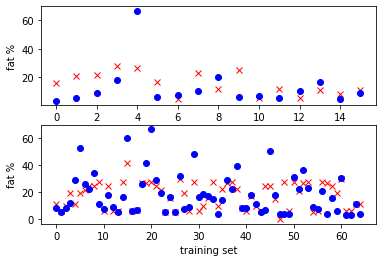

In [431]:
#A little bit of plotting

x = [i for i in range(16)]


fig = plt.figure()
fig1 = fig.add_subplot(211)
fig1.set_ylabel('fat %')
fig1.set_xlabel('test set')
plot = plt.plot(x, prediction.detach(), 'rx', x, dataset.test_targets, 'bo')

x2 = [i for i in range(65)]

fig2 = fig.add_subplot(212)
fig2.set_ylabel('fat %')
fig2.set_xlabel('training set')

plot = plt.plot(x2, fat_net(dataset.train).detach(), 'rx', x2, dataset.targets, 'bo')